In [63]:
#!python
#!python
import matplotlib.pyplot as plt
import gillespy2
from gillespy2 import Model, Species, Parameter, Reaction
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver
from numpy import *
import pylab as p
import numpy as np
from numpy import *
import pylab as p
# Definition of parameters
a = 8
b = 0.02
c = 8
d = 1
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [64]:
#!python
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True


True

In [65]:
#!python
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])


In [66]:
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])

In [67]:
#!python
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199

In [68]:
#!python
from scipy import integrate
t = linspace(0, 10,  500)              # time
X0 = array([375, 125])                     # initials conditions: 10 rabbits and 2 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

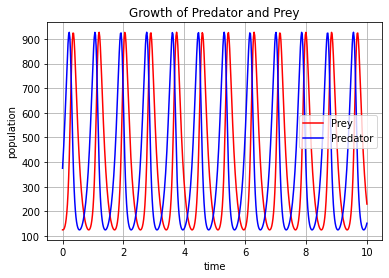

In [69]:
#!python
foxes,rabbits = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Prey')
p.plot(t, foxes  , 'b-', label='Predator')
p.grid()
p.legend(loc='best')


p.xlabel('time')
p.ylabel('population')
p.title('Growth of Predator and Prey')
f1.savefig('rabbits_and_foxes_1.png')
#put raw data into file
#write code that reads both data and plots
#plot difference between predator curves(absolute value)

In [70]:
from numpy import asarray
from numpy import savetxt
# define data
dataY = X.T
# save to csv file
savetxt('datasssss.csv', dataY, delimiter=',')

In [71]:
from numpy import asarray
from numpy import savetxt
# define data
dataX = t
savetxt('datadata.csv', dataX, delimiter=',')

In [27]:
#######################################################

In [37]:
alpha = 1. #mortality rate due to predators
beta = 0.1
delta = 1.5
gamma = 0.75
x0 = 10
y0 = 5

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [38]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T


In [38]:
(0, 15, 1000)

(0, 15, 1000)

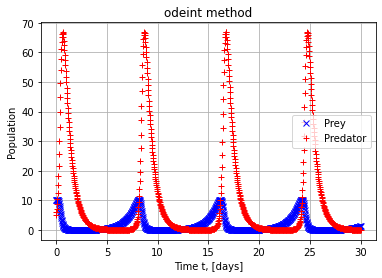

In [40]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Prey')
plt.plot(t, y, '+r', label = "Predator")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()